Exploratory Data Analysis

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("weather-station-streams.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224525 entries, 0 to 224524
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   _id                 224525 non-null  object
 1   weather_station_id  224525 non-null  object
 2   created_at          224525 non-null  int64 
 3   params              224525 non-null  object
 4   status              224525 non-null  int64 
 5   _class              224525 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.3+ MB
None


In [29]:
df

,_id,weather_station_id,created_at,params,status,_class
0,"""6418715f3cd853240a9890ac""",000017A7,1678539648,"[{""name"":""Precipitation"",""unit"":""mm"",""value"":0...",1,com.agri40.weatherstationmonitoring.sensoring....
1,"""641871623cd853240a9890ad""",000017A7,1678543232,"[{""name"":""Precipitation"",""unit"":""mm"",""value"":0...",1,com.agri40.weatherstationmonitoring.sensoring....
2,"""641871643cd853240a9890ae""",000017A7,1678546816,"[{""name"":""Precipitation"",""unit"":""mm"",""value"":0...",1,com.agri40.weatherstationmonitoring.sensoring....
3,"""641871663cd853240a9890af""",000017A7,1678550400,"[{""name"":""Precipitation"",""unit"":""mm"",""value"":0...",1,com.agri40.weatherstationmonitoring.sensoring....
4,"""641871683cd853240a9890b0""",000017A7,1678553984,"[{""name"":""Precipitation"",""unit"":""mm"",""value"":0...",1,com.agri40.weatherstationmonitoring.sensoring....
...,...,...,...,...,...,...
224520,"""65855bb4948e9147de35944e""",00206457,1703210400,"[{""name"":""HC Air temperature"",""unit"":""°C"",""val...",1,com.agri40.weatherstationmonitoring.sensoring....
224521,"""65855bb5948e9147de35944f""",002040BB,1703239200,"[{""name"":""HC Air temperature"",""unit"":""°C"",""val...",1,com.agri40.weatherstationmonitoring.sensoring....
224522,"""65855bb5948e9147de359450""",0020F03C,1703235600,"[{""name"":""HC Air temperature"",""unit"":""°C"",""val...",1,com.agri40.weatherstationmonitoring.sensoring....
224523,"""65855bb6948e9147de359451""",00203F1B,1703239200,"[{""name"":""HC Air temperature"",""unit"":""°C"",""val...",1,com.agri40.weatherstationmonitoring.sensoring....


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224525 entries, 0 to 224524
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   _id                 224525 non-null  object
 1   weather_station_id  224525 non-null  object
 2   created_at          224525 non-null  int64 
 3   params              224525 non-null  object
 4   status              224525 non-null  int64 
 5   _class              224525 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.3+ MB
None


In [31]:
print(df._class[0])

com.agri40.weatherstationmonitoring.sensoring.domain.Stream


In [32]:
import json

# Convert 'params' column from JSON string to Python dictionary
df['params'] = df['params'].apply(lambda x: json.loads(x.replace("'", '"')))

# Extract parameters into separate columns
df['Precipitation'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'Precipitation'), None))
df['Air_temperature'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'HC Air temperature'), None))
df['Relative_humidity'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'HC Relative humidity'), None))
df['Solar_radiation'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'Solar radiation'), None))
df['Wind_orientation'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'Wind orientation'), None))
df['Wind_speed'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'Wind speed'), None))
df['Battery'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'Battery'), None))
df['Dew_Point'] = df['params'].apply(lambda x: next((item['value'] for item in x if item['name'] == 'Dew Point'), None))

# Drop the original 'params' column if needed
df.drop('params', axis=1, inplace=True)

In [33]:
df

,_id,weather_station_id,created_at,status,_class,Precipitation,Air_temperature,Relative_humidity,Solar_radiation,Wind_orientation,Wind_speed,Battery,Dew_Point
0,"""6418715f3cd853240a9890ac""",000017A7,1678539648,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,21.2,57.4,938.0,253.0,1.7,7186.0,12.2
1,"""641871623cd853240a9890ad""",000017A7,1678543232,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,22.1,52.0,886.0,263.0,1.5,7186.0,11.5
2,"""641871643cd853240a9890ae""",000017A7,1678546816,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,22.9,48.0,767.0,254.0,1.3,7186.0,11.0
3,"""641871663cd853240a9890af""",000017A7,1678550400,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,22.8,46.1,579.0,247.0,1.7,7196.0,10.3
4,"""641871683cd853240a9890b0""",000017A7,1678553984,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,22.2,46.4,349.0,241.0,1.5,7186.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224520,"""65855bb4948e9147de35944e""",00206457,1703210400,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,8.8,74.7,NaN,36.0,0.5,6516.0,NaN
224521,"""65855bb5948e9147de35944f""",002040BB,1703239200,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,7.9,80.9,NaN,NaN,0.4,6613.0,NaN
224522,"""65855bb5948e9147de359450""",0020F03C,1703235600,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,6.9,72.8,NaN,111.0,0.4,6462.0,NaN
224523,"""65855bb6948e9147de359451""",00203F1B,1703239200,1,com.agri40.weatherstationmonitoring.sensoring....,0.0,9.4,69.4,NaN,199.0,0.7,6778.0,NaN


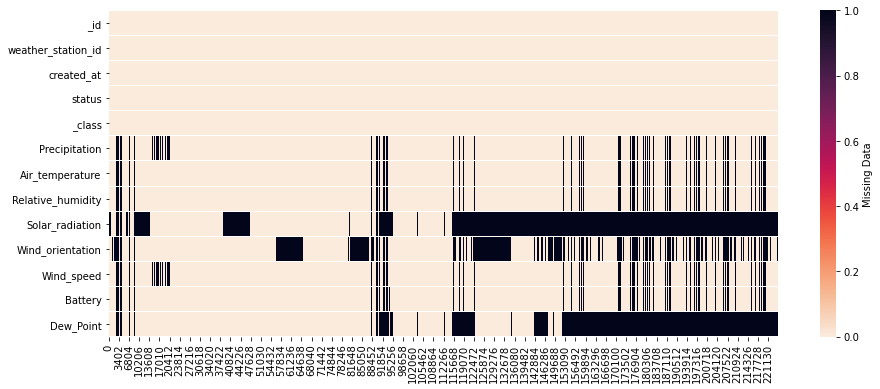

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull().transpose(),cmap="rocket_r",cbar_kws={'label': 'Missing Data'})

In [38]:
num_weather_stations = df['weather_station_id'].nunique()
print(f"Number of Weather Stations: {num_weather_stations}")

Number of Weather Stations: 23


In [42]:
print(df.columns)

Index(['_id', 'weather_station_id', 'created_at', 'status', '_class',
       'Precipitation', 'Air_temperature', 'Relative_humidity',
       'Solar_radiation', 'Wind_orientation', 'Wind_speed', 'Battery',
       'Dew_Point'],
      dtype='object')


In [40]:
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
missing_values_per_station = df[columns_with_missing_values + ['weather_station_id']].groupby('weather_station_id').apply(lambda x: x.isnull().sum())

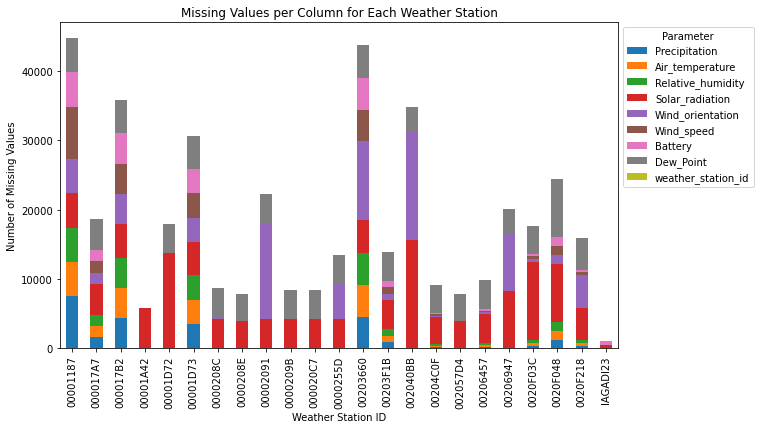

In [41]:
# Plot the missing values
missing_values_per_station.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Missing Values per Column for Each Weather Station')
plt.xlabel('Weather Station ID')
plt.ylabel('Number of Missing Values')
plt.legend(title='Parameter', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [52]:
# Assuming df is your DataFrame
selected_columns = ['Battery', 'Precipitation', 'Air_temperature', 'Relative_humidity', 'Solar_radiation', 'Wind_orientation', 'Wind_speed', 'Dew_Point']
custom_summary = df[selected_columns].agg(['count', 'mean', 'median', 'min', 'quantile', 'max']).transpose()

# Rename the quantile columns for clarity
custom_summary.rename(columns={'quantile': '25%'}, inplace=True)

print(custom_summary)

                      count         mean  median     min     25%     max
Battery            201505.0  6821.294444  6816.0  2648.0  6816.0  7420.0
Precipitation      199510.0     0.063833     0.0     0.0     0.0    32.3
Air_temperature    202040.0    19.727014    18.9    -6.2    18.9    48.9
Relative_humidity  202040.0    53.906071    50.8     0.0    50.8   100.0
Solar_radiation     91223.0   192.829824     8.0     0.0     8.0  1250.0
Wind_orientation   147940.0   188.976761   197.0     0.0   197.0   359.0
Wind_speed         199524.0     0.620420     0.4     0.0     0.4    12.0
Dew_Point          131120.0     6.563019     7.0   -32.2     7.0    22.6
